# **Titanic Survival Prediction**

----------------
## **Context** 
----------------
The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

------------------
## **Objective**
------------------

The objective of this problem is to build a predictive model that answers the question: “**what sorts of people were more likely to survive?**” using the passenger data (i.e., name, age, gender, socio-economic class, etc.).

--------------------------
## **Data Dictionary**
--------------------------

- **survival** - If passenger will survive or not (Yes - 1, No - 0).
- **pclass** - Ticket class (1st, 2nd, and 3rd).
- **sex** - Sex of the passenger (M / F).
- **Age** - Age in years.
- **sibsp** - The number of siblings / spouses aboard the Titanic.
- **parch** - The number of parents / children aboard the Titanic.
- **ticket** - Ticket number.
- **fare** - Passenger fare.
- **cabin** - Cabin number.
- **embarked** - Port of embarkation.

Original Dataset: <a href="https://www.kaggle.com/c/titanic">Click Here</a>

## **Importing necessary libraries**

In [6]:
# Import necessary libraries
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

plt.style.use('ggplot')

import seaborn as sns

from sklearn import tree

# To ignore the warnings
import warnings
warnings.filterwarnings('ignore')

## **Loading the dataset**

In [7]:
titanic_df = pd.read_csv("train.csv")

## **Checking the info of the dataset**

In [8]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Observations:**

- There are **891 rows and 12 columns** in the data.
- The columns Age, Cabin, and Embarked have **missing values**.
- There are some columns like 'PassengerId', 'Name', 'Ticket', 'Cabin', and 'Fare' which would not add value to the model. We can **drop these columns**.

## **Data Preprocessing**

In [9]:
# Filling missing values in the Age column using the median of the Age column
titanic_df = titanic_df.fillna(titanic_df.median())

# Filling missing values in the Embarked column using the mode of the column, i.e., 'S'
titanic_df['Embarked'] = titanic_df['Embarked'].fillna('S')

# Creating a new column
titanic_df['FamilySize'] = titanic_df['Parch'] + titanic_df['SibSp']

# Dropping un-necessary columns
titanic_df.drop(['PassengerId', 'Name', 'Parch', 'SibSp', 'Ticket', 'Cabin', 'Fare'], axis = 1, inplace = True)

# Replacing the initials in the Embarked column with the full name
titanic_df.loc[titanic_df['Embarked'] == 'C', 'Embarked'] = 'Cherbourg'

titanic_df.loc[titanic_df['Embarked'] == 'S', 'Embarked'] = 'Southampton'

titanic_df.loc[titanic_df['Embarked'] == 'Q', 'Embarked'] = 'Queenstown'

# Binning the Age column
bins = [0, 13, 25, 40, 65, np.inf]

names = ['<13', '13-25', '25-40', '40-65', '65+']

titanic_df['Age'] = pd.cut(titanic_df['Age'], bins, labels = names)

# Printing 10 observations
titanic_df.sample(10)

,Survived,Pclass,Sex,Age,Embarked,FamilySize
239,0,2,male,25-40,Southampton,0
441,0,3,male,13-25,Southampton,0
233,1,3,female,<13,Southampton,6
156,1,3,female,13-25,Queenstown,0
869,1,3,male,<13,Southampton,2
308,0,2,male,25-40,Cherbourg,1
464,0,3,male,25-40,Southampton,0
686,0,3,male,13-25,Southampton,5
360,0,3,male,25-40,Southampton,5
217,0,2,male,40-65,Southampton,1


In [16]:
def prepareData(csv_file):

    data = pd.read_csv(csv_file)

    # Filling missing values in the Age column using the median of the Age column
    data = data.fillna(data.median())

    # Filling missing values in the Embarked column using the mode of the column, i.e., 'S'
    data['Embarked'] = data['Embarked'].fillna('S')

    # Creating a new column
    data['FamilySize'] = data['Parch'] + data['SibSp']

    # Dropping un-necessary columns
    data.drop(['PassengerId', 'Name', 'Parch', 'SibSp', 'Ticket', 'Cabin', 'Fare'], axis = 1, inplace = True)

    # Replacing the initials in the Embarked column with the full name
    data.loc[data['Embarked'] == 'C', 'Embarked'] = 'Cherbourg'

    data.loc[data['Embarked'] == 'S', 'Embarked'] = 'Southampton'

    data.loc[data['Embarked'] == 'Q', 'Embarked'] = 'Queenstown'

    # Binning the Age column
    bins = [0, 13, 25, 40, 65, np.inf]

    names = ['<13', '13-25', '25-40', '40-65', '65+']

    data['Age'] = pd.cut(data['Age'], bins, labels = names)

    # Printing 10 observations
    data.sample(10)

    # Encoding the categorical columns
    data.Sex = pd.factorize(data.Sex)[0]

    data.Embarked = pd.factorize(data.Embarked)[0]

    data.Age = pd.factorize(data.Age)[0]

    data.sample(10)

    return data

In [ ]:
# Encoding the categorical columns
titanic_df.Sex = pd.factorize(titanic_df.Sex)[0]

titanic_df.Embarked = pd.factorize(titanic_df.Embarked)[0]

titanic_df.Age = pd.factorize(titanic_df.Age)[0]

titanic_df.sample(10)

Extracting samples from the original data to create the train data (80%) and the test data (20%).

## **Splitting the dataset**

In [11]:
pcnt = .8

# Random state is a seed value
train = titanic_df.sample(frac = pcnt, random_state = 14)

test = titanic_df.drop(train.index)

# Create train and test datasets

X_train = train[['Pclass', 'Sex', 'Age', 'Embarked', 'FamilySize']]

X_test = test[['Pclass', 'Sex', 'Age', 'Embarked', 'FamilySize']]

y_train = train['Survived']

y_test = test['Survived']

np.random.seed(0)

## **Decision Tree**

Let's create a decision tree with 6 levels (max_depth = 5) and visualize the same.

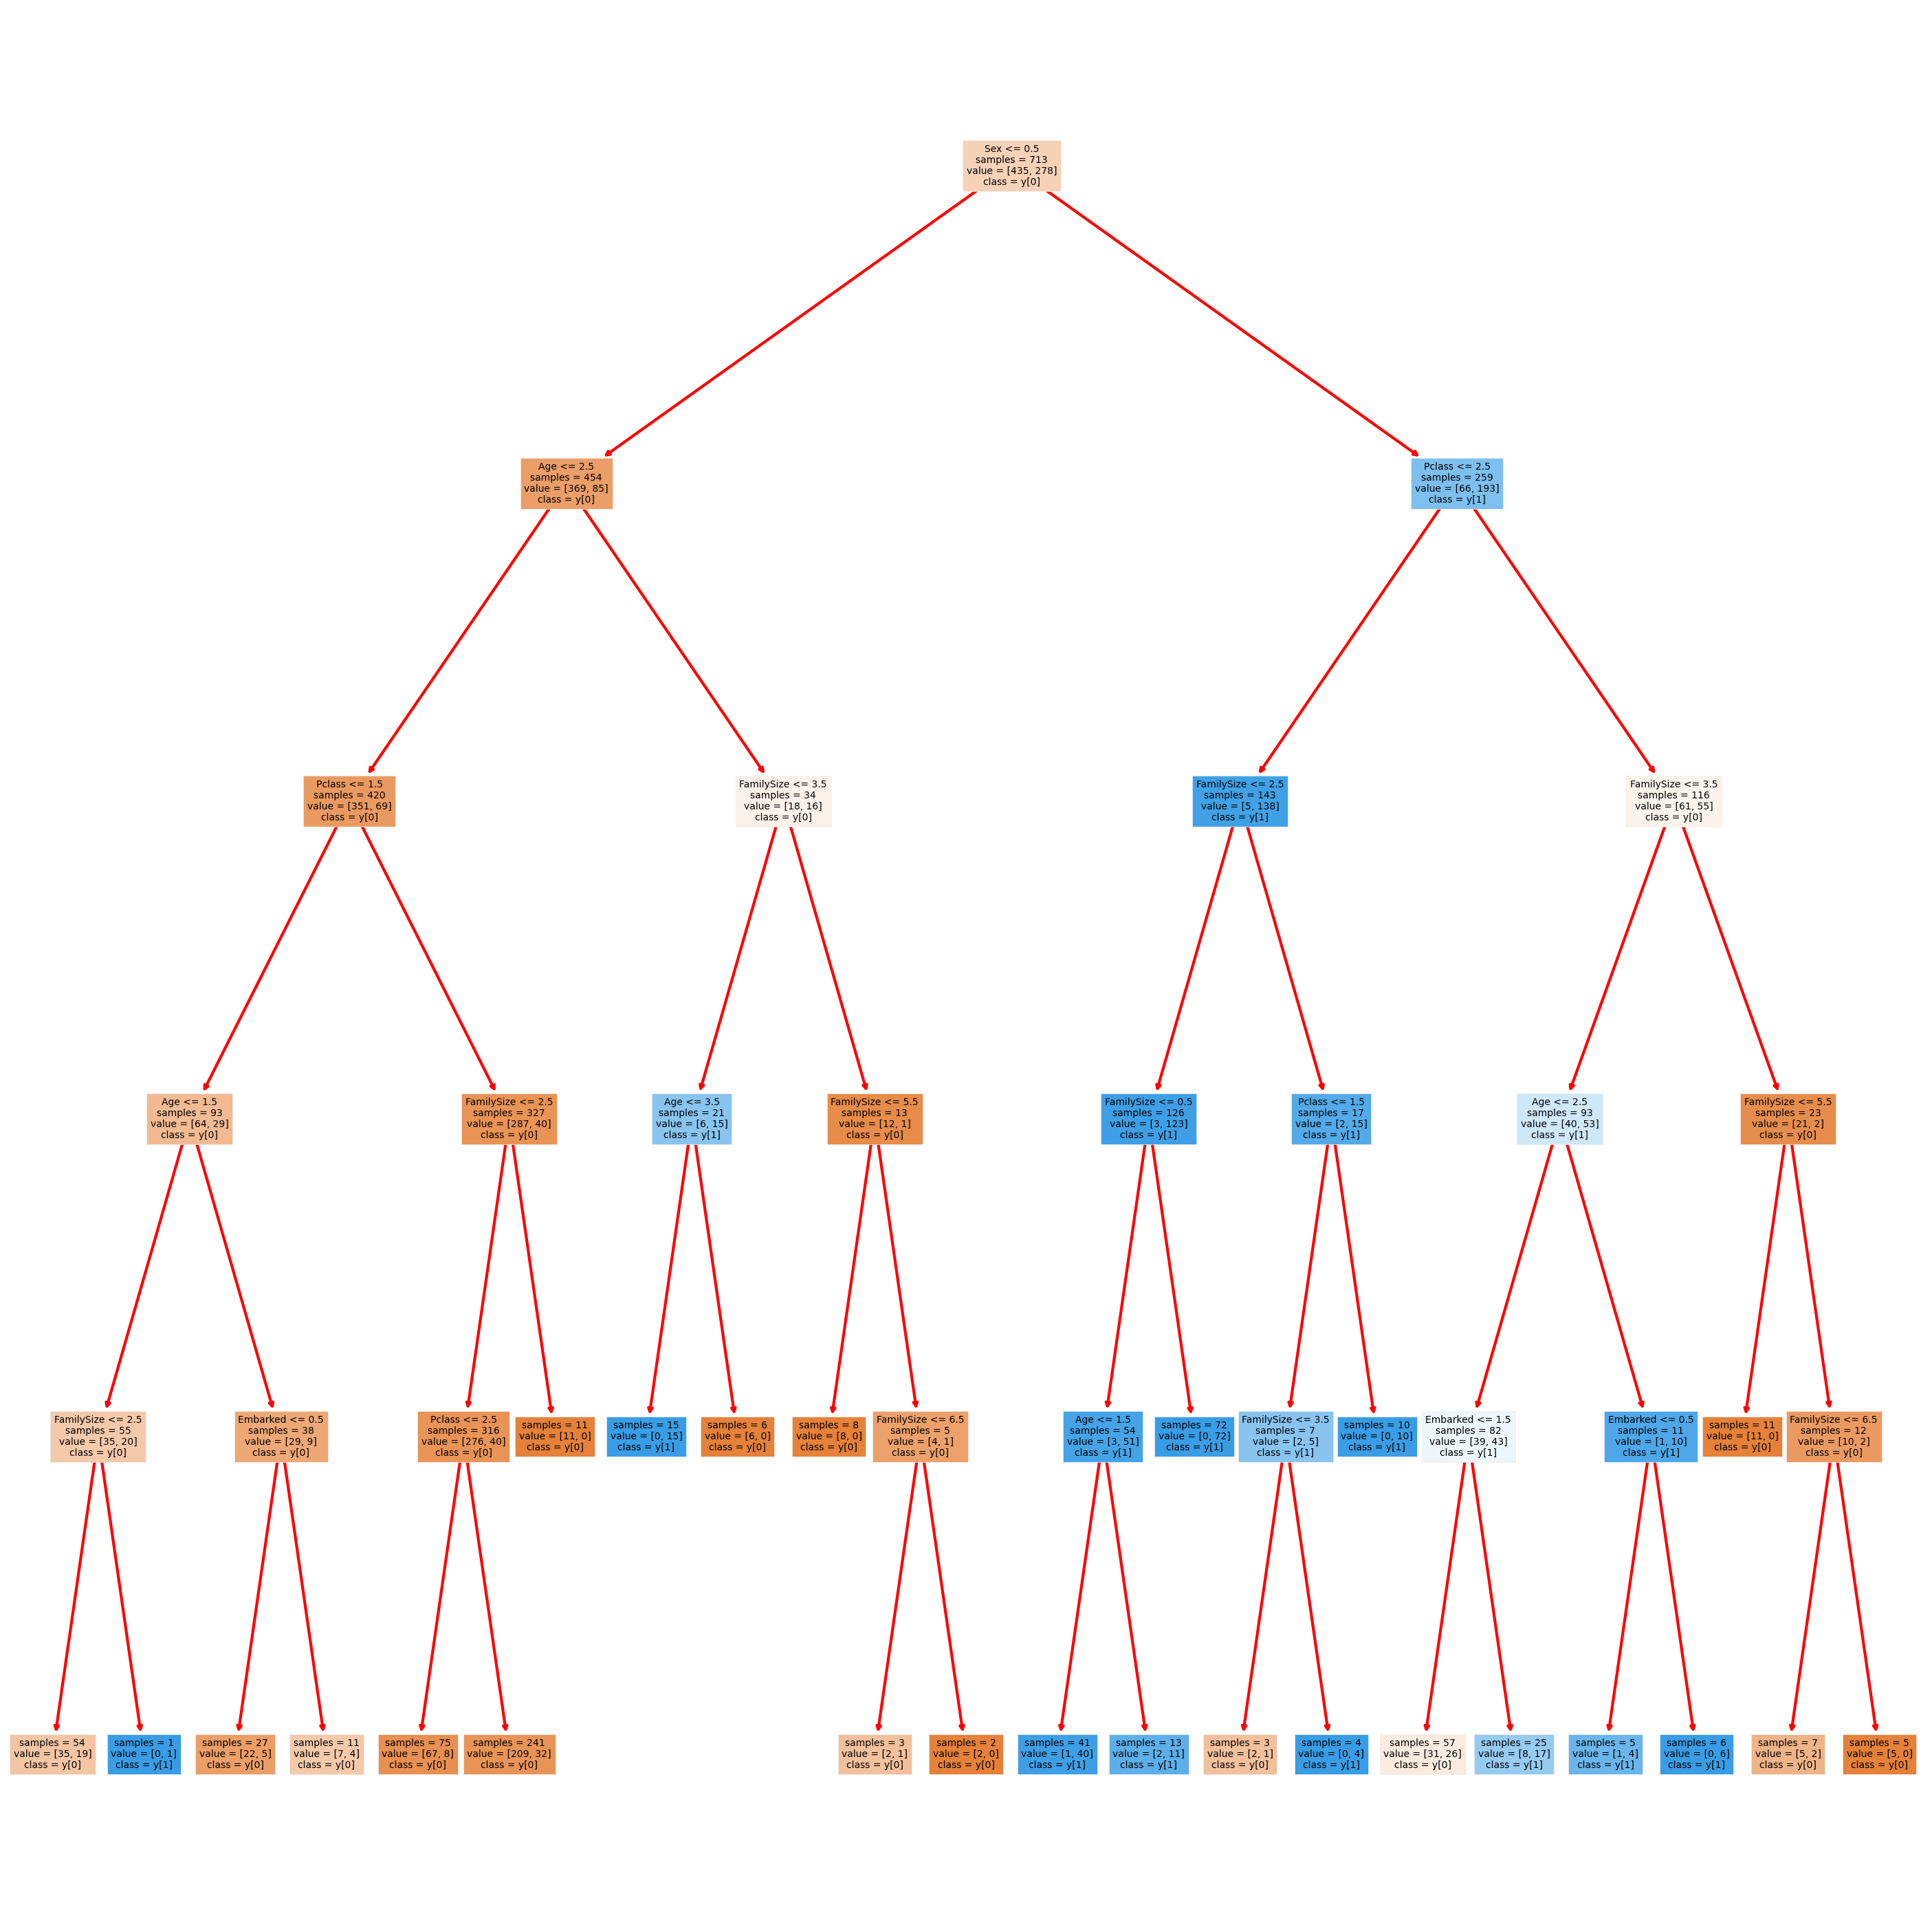

In [12]:
# Creating a decision tree model
clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 5)

# Fitting the model on the train data
clf = clf.fit(X_train, y_train)

fig, ax = plt.subplots(figsize = (36, 36))

out = tree.plot_tree(clf, fontsize = 10, max_depth = 5, impurity = False, filled = True, feature_names = ['Pclass', 'Sex', 'Age', 'Embarked', 'FamilySize'], class_names = True)

for o in out:
    
    arrow = o.arrow_patch
    
    if arrow is not None:
        
        arrow.set_edgecolor('red')
        
        arrow.set_linewidth(3)

# Display the plot       
plt.show()

**Observations:**
- We can see that the first split is based on the sex of the passenger. It is one of the most important factors while figuring out who survived, as we can see that in the leaves, more females survived in comparison to males. This might be because females were extracted first.
- We can see that among females, more from the first class and second class passengers survived in comparison to passengers who were traveling in the 3rd class.
- For males, age is an important factor. There is only one passenger younger than 25 years of age who survived.

Note: Blue color signifies survived = 1 and orange color signifies survived = 0.

Now, let's visualize and compare the error on the train data and the test data for different values of max_depth in the decision tree classifier.

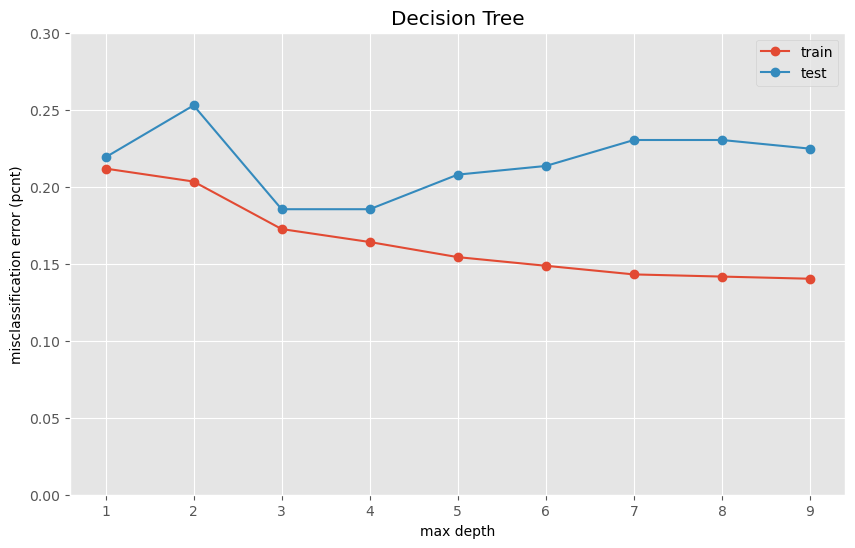

In [13]:
train_scores = []

test_scores = []

for depth in range(1, 10):
    
    clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = depth)
    
    clf = clf.fit(X_train, y_train)
    
    train_scores.append(1 - clf.score(X_train, y_train))
    
    test_scores.append(1 - clf.score(X_test, y_test))

plt.plot(range(1, 10), train_scores, '-o', label = "train")

plt.plot(range(1, 10), test_scores, '-o', label = "test")

plt.legend(loc = 'best')

plt.xlabel('max depth')

plt.ylabel('misclassification error (pcnt)')

# Setting the range of the Y-axis
plt.ylim(0, 0.3)

plt.title(f"Decision Tree")

fig = plt.gcf()

fig.set_size_inches(10, 6)

plt.show()

**Observations:**
- We can see that the training error keeps decreasing as the maximum depth increases but the test error eventually starts increasing after the initial decrease.
- A model with low train error and high test error implies low bias and high variance of the model, i.e., the model has started to overfit the training data.
- The train and the test error are close for max_depth = 1 but that is again not a good model as the decision tree is making predictions based on a single node. We can say that the model has a high bias.
- The max_depth = 3 seems like the "sweet spot" where training and testing errors are balanced.

Now, let's see what would be the train and the test error for the same values of max_depth in a Random Forest Classifier.

## **Random Forest**

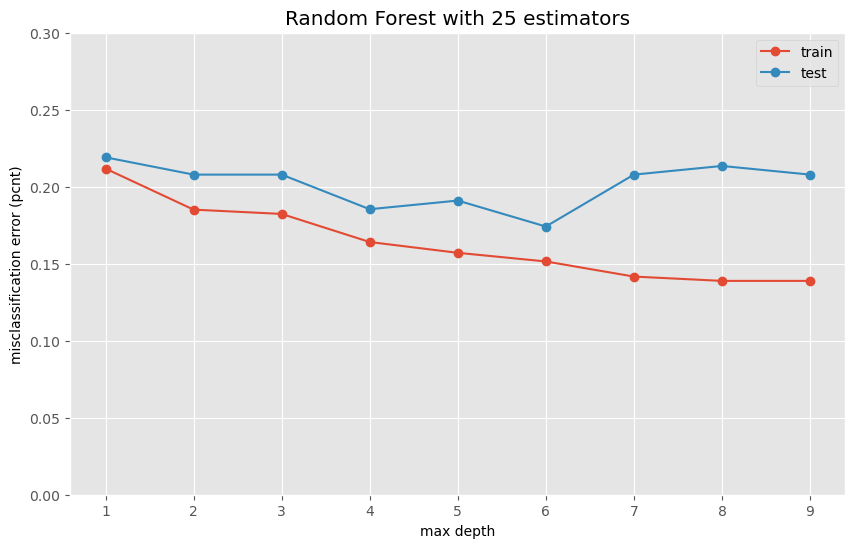

In [14]:
from sklearn.ensemble import RandomForestClassifier

train_scores = []

test_scores = []

for depth in range(1, 10):
    
    clf = RandomForestClassifier(random_state = 0, criterion = 'entropy', max_depth = depth, n_estimators = 25)
    
    clf = clf.fit(X_train, y_train)
    
    train_scores.append(1 - clf.score(X_train, y_train))
    
    test_scores.append(1 - clf.score(X_test, y_test))

plt.plot(range(1, 10), train_scores, '-o', label = "train")

plt.plot(range(1, 10), test_scores, '-o', label = "test")

plt.legend(loc = 'upper right')

plt.xlabel('max depth')

plt.ylim(0, 0.3)

plt.ylabel('misclassification error (pcnt)')

plt.title(f"Random Forest with 25 estimators")

fig = plt.gcf()

fig.set_size_inches(10, 6)

plt.show()

**Observations:**
- Random forest helps to reduce the extent of the overfitting problem in decision trees.
- It takes the average of several independent decision trees which helps to reduce the variance of the model.
- In the current example, we are averaging the output of 25 decision trees. 
- We can see that the random forest is giving generalized results at max_depth = 6 which was overfitting for a single decision tree.

## **Conclusion**

- After data preprocessing, we visualized the decision tree classifier and interpreted the output. 
- We also compared the errors on the train and test sets to find the optimal value for the hyperparameter max_depth, which came out to be 3.
- We also observed that Random Forest gives more generalized results than a single decision tree for the sample value of max_depth. The optimal max_depth for Random Forest came out to be 6.
- Interested learners can go ahead and build the decision tree and the random forest model with optimal values of max_depth and make predictions on an unseen dataset, named "test_titanic.csv".

In [22]:
real_test = prepareData("test.csv")

In [23]:
real_test.head()

,Pclass,Sex,Age,Embarked,FamilySize
0,3,0,0,0,0
1,3,1,1,1,1
2,2,0,1,0,0
3,3,0,0,1,0
4,3,1,2,1,2


In [24]:
clf = RandomForestClassifier(random_state = 0, criterion = 'entropy', max_depth = 6, n_estimators = 25)
    
clf = clf.fit(X_train, y_train)

print("train score = ", (1 - clf.score(X_train, y_train)))

real_test['survival'] = clf.predict(real_test)




train score =  0.1514726507713885


In [25]:
real_test.head(25)

,Pclass,Sex,Age,Embarked,FamilySize,survival
0,3,0,0,0,0,0
1,3,1,1,1,1,1
2,2,0,1,0,0,0
3,3,0,0,1,0,0
4,3,1,2,1,2,0
5,3,0,2,1,0,0
6,3,1,0,0,0,0
7,2,0,0,1,2,0
8,3,1,2,2,0,1
9,3,0,2,1,2,0


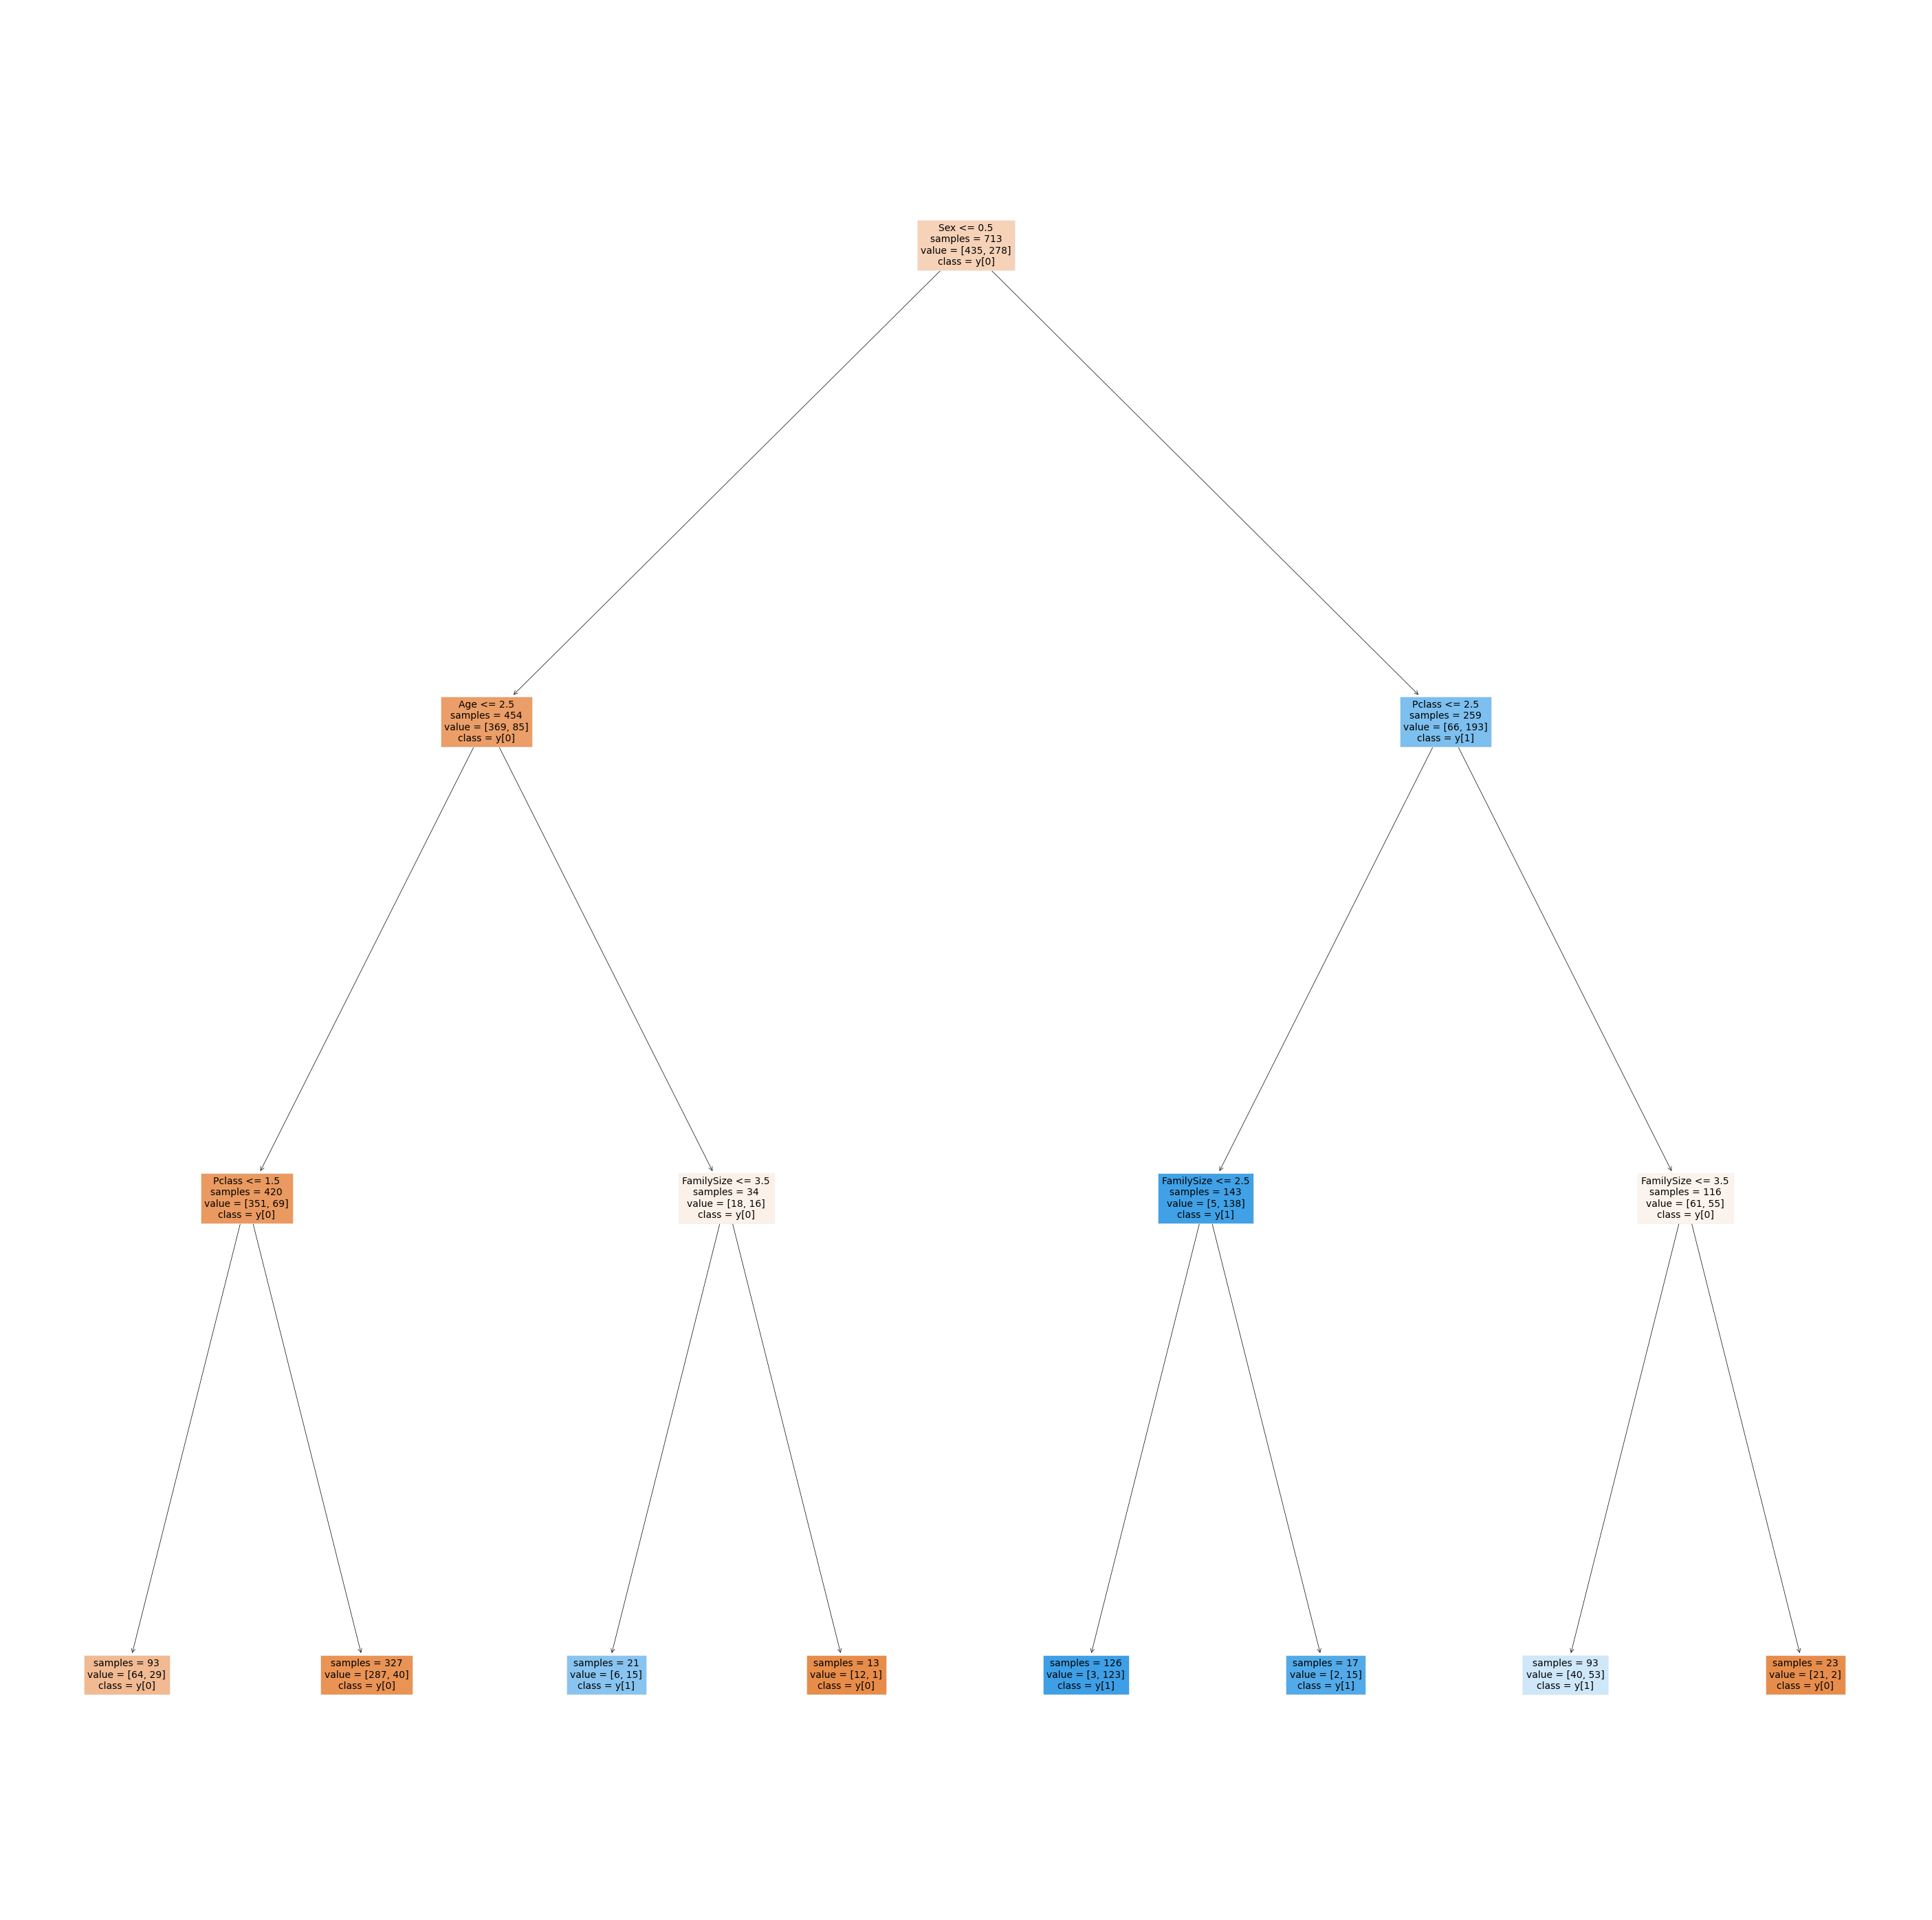

In [26]:

# Creating a decision tree model
clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)

# Fitting the model on the train data
clf = clf.fit(X_train, y_train)

fig, ax = plt.subplots(figsize = (36, 36))

out = tree.plot_tree(clf, fontsize = 10, max_depth = 5, impurity = False, filled = True, feature_names = ['Pclass', 'Sex', 'Age', 'Embarked', 'FamilySize'], class_names = True)

# Display the plot       
plt.show()

In [28]:
feature_importance = pd.Series(clf.feature_importances_, index=X_train.columns)
feature_importance

Pclass        0.280321
Sex           0.581075
Age           0.040778
Embarked      0.000000
FamilySize    0.097826
dtype: float64